In [1]:
# Megaline Plan Matcher: Precision Model for Subscriber Plan Recommendation

## Project Description

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. By accessing the behavior data about subscribers who have already switched to the new plans, it is possible to develop a model that will pick the right plan. The data preprocessing step has been completed in the previous Statistical Data Analyis, so we can now create the model to prediction this outcome witht he highets possible accuracy.  Since the outcomes are categorical, with two possibilities, either Smart or Ultra, the focus will be on creating a Classification algorithm model. 

Key Objectives:

- Develop a classification model that accurately predicts whether a subscriber should be recommended the Smart or Ultra plan.
- Achieve a model accuracy threshold of at least 0.75, ensuring that recommendations are reliable and effective.
- Validate the model's performance using a test dataset to confirm its real-world viability.

## Data description
Every observation in the dataset contains monthly behavior information about one user. 
The information given is as follows: 
- сalls — number of calls,
- minutes — total call duration in minutes,
- messages — number of text messages,
- mb_used — Internet traffic used in MB,
- is_ultra — plan for the current month (Ultra - 1, Smart - 0).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


## Load Data

In [5]:
df_user_behavior = pd.read_csv('users_behavior.csv')

In [6]:
df_user_behavior.head()
df_user_behavior.info()
df_user_behavior.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Ultra vs. Smart

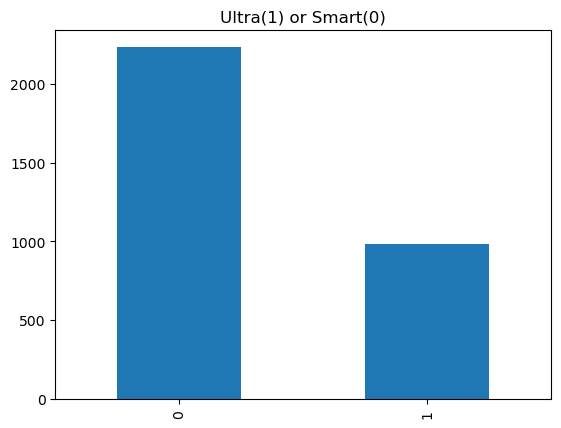

In [7]:
df_user_behavior.groupby('is_ultra').count().plot(
                     kind='bar',
                     y='mb_used',
                     legend=False)
plt.title('Ultra(1) or Smart(0)')
plt.ylabel('')
plt.xlabel('')
plt.show()

The above graph shows that there are more smart users than ultra users. Ultra users are classified as 1 and smart users are classified as 0. Meaning that there are 2 options for users to choose from, and the majority of users choose the smart plan. 

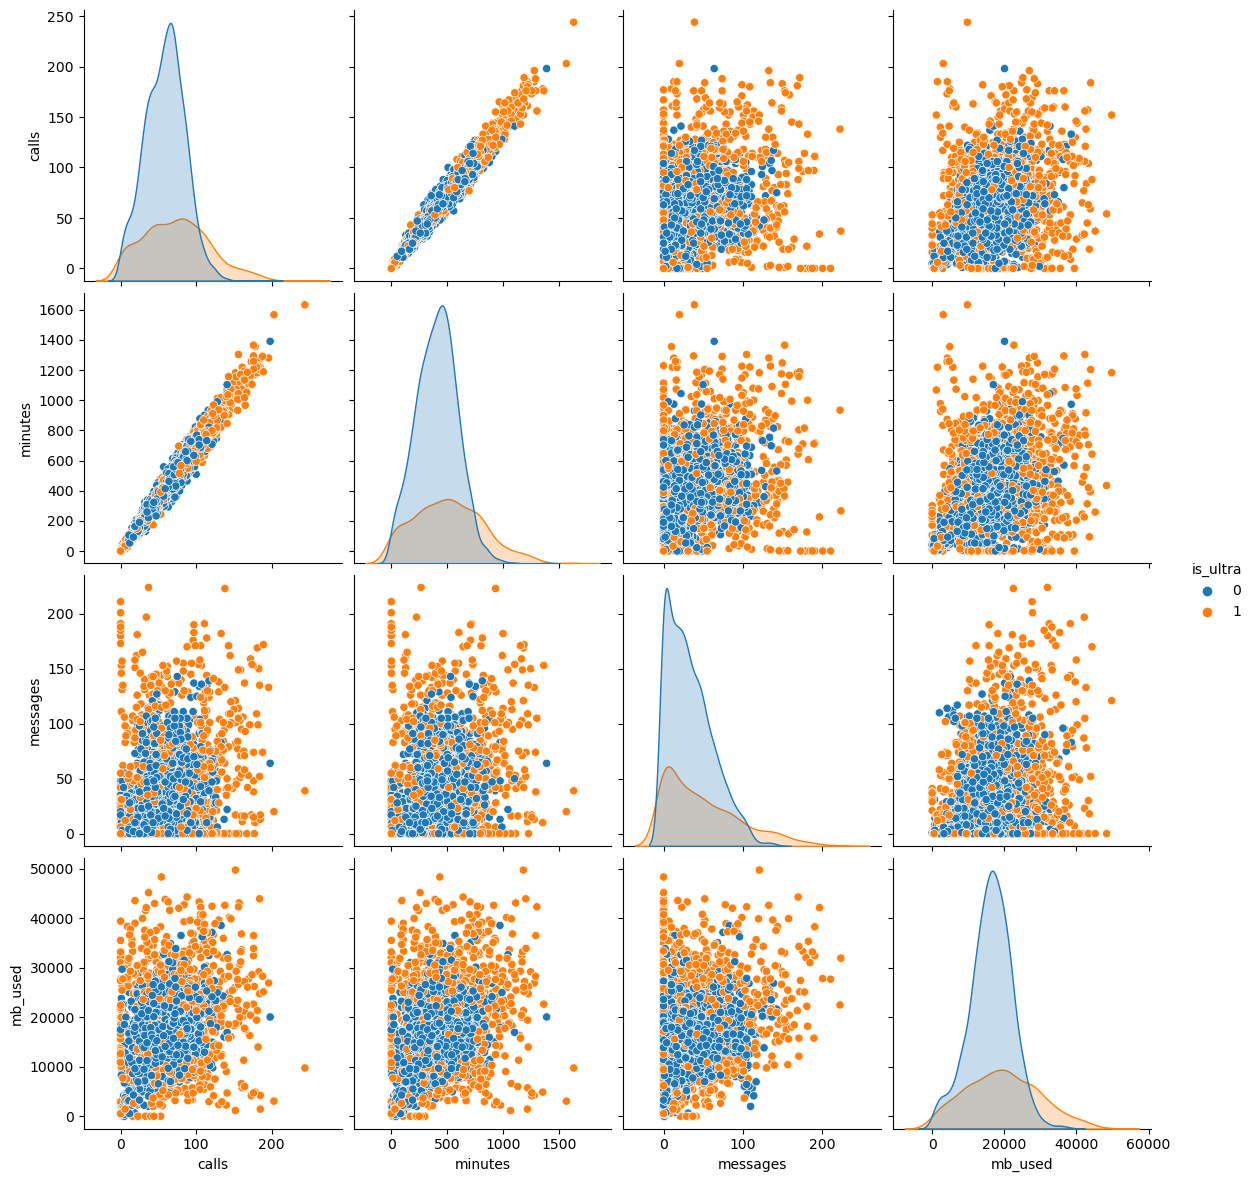

In [8]:
target = "is_ultra"
features = ["calls", "minutes", "messages", "mb_used"]
sns.pairplot(df_user_behavior, hue=target, height=3)

These plots show that the data is not linearly separable. The data is not linearly separable because the data points are not clustered in a way that would allow a line to be drawn to separate the data. The data points are scattered throughout the graph and there is no way to draw a line to separate the data points. We see this in calls, minutes, messages, and mb_used. The data points are scattered throughout the graph and not linear.

### Splitting Data into Two Sets

In [9]:
df_user_behavior_train, df_user_behavior_valid = df_user_behavior[features],df_user_behavior[target]

features_train, features_test, target_train, target_test = train_test_split(
df_user_behavior_train,
 df_user_behavior_valid,
 test_size=0.25, 
random_state=54321,
stratify=df_user_behavior_valid)

features_train, features_valid, target_train, target_valid = train_test_split(
features_train,
 target_train,
 test_size=0.25, 
random_state=54321)


The data is split into three parts: training, validation, and test sets. The model is trained on the training set. Then predictions are made on the validation set and model quality is assessed using the validation set. Finally, the model is tested on the test set to confirm the quality of the model by comparing the predictions with the actual values. the amount values are 50%, 25%, 25% respectively.

In [10]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)


(1807, 4)

(1807,)

(603, 4)

(603,)

## Decision Tree Classifier

In [11]:
model = DecisionTreeClassifier(random_state=54321)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)
print("Accuracy:", accuracy_valid)

Accuracy: 0.7180762852404643


The decision tree classifier helps predict the class or category of something based on its features. Using the DecisionTreeClassifier, we were able to achieve an accuracy of 0.72. The accuracy is not bad, but it may be possible to improve it using a different model.

## Random Forest Classifier

In [12]:
model = RandomForestClassifier(random_state=54321)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)
print("Accuracy:", accuracy_valid)

Accuracy: 0.7943615257048093


The random forest classifier combines many decision trees to make more accurate predictions. It uses different subsets of the training data and features for each tree to reduce overfitting. Using this classification model, the accuracy has improved to 74% which is higher than the one before. 

## Logistic Regression

In [13]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)
print("Accuracy:", accuracy_valid)


Accuracy: 0.7064676616915423


Logistic Regression is the worst model to use as it has the lowest accuracy score.

In [14]:
predictions = model.predict(features_test)
actual_values = target_test

mse = mean_squared_error(actual_values, predictions)
print("Mean Squared Error (MSE):", mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.2947761194029851
Root Mean Squared Error (RMSE): 0.5429328866471298


To calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), we to compare the predicted values of the model with the actual target values. 

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Not sure why the logistic regression model is evaluated on the test set, and why MSE/RMSE is used: those are regression metrics

</div>

## Changing Hyperparameters with Randon Forest Classifer

In [15]:

hyperparams1 = {
    'n_estimators': 100,
    'max_depth': 5,
    'random_state': 12345
}

hyperparams2 = {
    'n_estimators': 200,
    'max_depth': 10,
    'random_state': 54321
}

model1 = RandomForestClassifier(**hyperparams1)

model1.fit(features_train, target_train)

predictions_valid1 = model1.predict(features_valid)

accuracy_valid1 = accuracy_score(target_valid, predictions_valid1)
print("Accuracy with hyperparameters 1:", accuracy_valid1)

model2 = RandomForestClassifier(**hyperparams2)

model2.fit(features_train, target_train)

predictions_valid2 = model2.predict(features_valid)

accuracy_valid2 = accuracy_score(target_valid, predictions_valid2)
print("Accuracy with hyperparameters 2:", accuracy_valid2)

if accuracy_valid1 > accuracy_valid2:
    best_model = model1
    best_hyperparams = hyperparams1
else:
    best_model = model2
    best_hyperparams = hyperparams2

predictions_test = best_model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
print("Accuracy on test set:", accuracy_test)



Accuracy with hyperparameters 1: 0.7877280265339967
Accuracy with hyperparameters 2: 0.7976782752902156
Accuracy on test set: 0.8121890547263682


By changing the hyperparameters, 1 and 2, we change the number of estimators and the max depth. By doing this, the accuracy of the Random Forest model increased from 0.78 to 0.80. This is a small increase, but it is still an increase. The accuracy on the test set is .81, which is a good accuracy. The Random Forest model is the best model to use for this project. 

## Sanity Check

In [16]:
dummy_model = DummyClassifier(strategy='most_frequent').fit(features_train, target_train)
dummy_preds = dummy_model.predict(features_test)
accuracy = dummy_model.score(features_test, target_test)

print(f"Mean accuracy on test set: {accuracy:.2f}")

Mean accuracy on test set: 0.69


In conclusion, the sanity check performed using the DummyClassifier with the 'most_frequent' strategy, provides a way to evaluate the performance of the model. The purpose of the sanity check is to ensure that any subsequent models developed are able to learn meaningful patterns and perform better than random approaches. The check returned 69% mean accuracy on the test, meaning that approximately 69% of the predictions made by the model align with the actual class labels in the test set.